In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from sklearn.cluster import MeanShift
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#prices_df = pd.read_csv("C:\k.v.singh\SJSU\Fall_2019\Machine Learning\machine-learning-stock-market-master (1)\machine-learning-stock-market-master\one_year_data.csv", index_col=[0], parse_dates=[0])
prices_df = pd.read_csv("C:\k.v.singh\SJSU\Fall_2019\CMPE257\machine-learning-stock-market\one_year_data.csv", index_col=[0], parse_dates=[0])
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
print (returns.columns)

Index(['Returns'], dtype='object')


In [3]:
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#print(cleaned_data)

In [4]:
X = cleaned_data
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_
print (cluster_centers)

[[ 0.20143837  0.1787825 ]
 [ 0.79491932  0.34453643]
 [-0.48726942  0.48486142]
 [-0.53526164  0.14786094]
 [-0.11168886  0.6996737 ]]


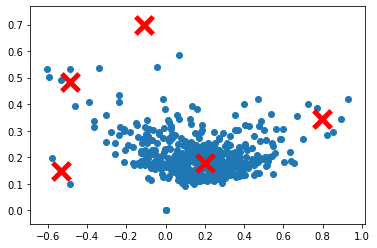

In [5]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection ='2d') 
#ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o')
#ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker ='x', color ='red', 
#           s = 300, linewidth = 5, zorder = 10) 
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], marker ='o') 
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='x', color ='red', 
           s = 300, linewidth = 5, zorder = 10)
  
plt.show() 

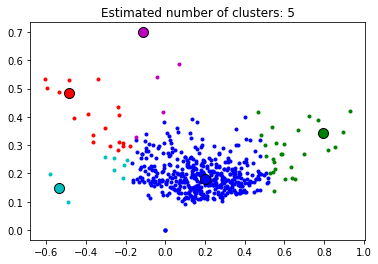

In [9]:
from itertools import cycle
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#print("number of estimated clusters : %d" % n_clusters_)

plt.figure()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=10)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()